In [ ]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd#gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-0t0l32j1
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-0t0l32j1
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/working_data.csv')
df.head(10)

,Title,Post_ID,Text,Author,Author_ID,Reply,LastReply,PublishTime,Like,Collect,...,sentiment_label,sentiment_score,Category,PostCount,ReplyCount,male_excluded,In_Replies,Out_Replies,In_Betweenness,Out_Betweenness
0,精华\n\n\n \n ...,1,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,Anon加重音,1,1115,2023-12-21,2020-10-09,2,4,...,positive,9.077597e-01,1,1,1,0,1021.0,9.0,0.015863,0.015863
1,精华\n\n\n \n ...,2,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,Anon加重音,1,64,2023-12-01,2020-10-14,1,2,...,negative,1.599090e-01,1,2,5,0,1021.0,9.0,0.015863,0.015863
2,精华\n\n\n \n ...,3,前情(意见征集贴) https://www.douban.com/group/topic/1...,Anon加重音,1,12,2023-07-04,2020-10-10,4,6,...,positive,1.000000e+00,1,3,1,0,1021.0,9.0,0.015863,0.015863
3,精华\n\n\n \n ...,4,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,Sophie,2,2,2023-05-03,2020-11-02,1,6,...,positive,9.999413e-01,1,1,0,0,2.0,0.0,0.000216,0.000216
4,精华\n\n\n \n ...,5,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,丸子,3,6,2023-03-25,2020-12-09,2,2,...,negative,2.440807e-08,1,1,1,0,10.0,1.0,0.000453,0.000453
5,精华\n\n\n \n ...,6,以下表格列出的情况只与组规中判定为“伸手党”一项有关，其他组规中规定的禁止项内容将直接删除。...,丸子,3,15,2022-12-09,2020-11-28,2,5,...,positive,9.993896e-01,1,2,1,0,10.0,1.0,0.000453,0.000453
6,精华\n\n\n \n ...,7,12.10 将本贴的内容整理为豆列，以方便大家查看：https://www.douban.c...,doe,4,54,2022-06-21,2020-09-23,5,5,...,positive,1.000000e+00,1,1,0,0,33.0,3.0,0.001225,0.001225
7,精华\n\n\n \n ...,8,前言：感谢各位组员的热心分享和疑惑解答，小组的一切一切都是承蒙各位的慷慨和热心，谢谢大家也希...,your chance,5,20,2021-09-13,2020-11-14,1,1,...,positive,1.000000e+00,1,1,2,0,19.0,13.0,0.000193,0.000193
8,精华\n\n\n \n ...,9,入组申请回答以下三个问题：本帖中找到的由14个汉字组成的暗号入组理由 (一两句话即可)你入组...,Anon加重音,1,30,2021-05-11,2020-09-25,4,5,...,positive,1.000000e+00,1,4,0,0,1021.0,9.0,0.015863,0.015863
9,精华\n\n\n \n ...,10,秉承着我们小组【善用组内搜索、拒绝伸手党】的优良传统，受姐妹小组women in tech管...,Anon加重音,1,10,2021-04-10,2021-03-29,1,1,...,negative,2.383281e-01,1,5,19,0,1021.0,9.0,0.015863,0.015863


In [ ]:
df.columns

Index(['Title', 'Post_ID', 'Text', 'Author', 'Author_ID', 'Reply', 'LastReply',
       'PublishTime', 'Like', 'Collect', 'Repost', 'Length', 'sentiment_label',
       'sentiment_score', 'Category', 'PostCount', 'ReplyCount',
       'male_excluded', 'In_Replies', 'Out_Replies', 'In_Betweenness',
       'Out_Betweenness'],
      dtype='object')

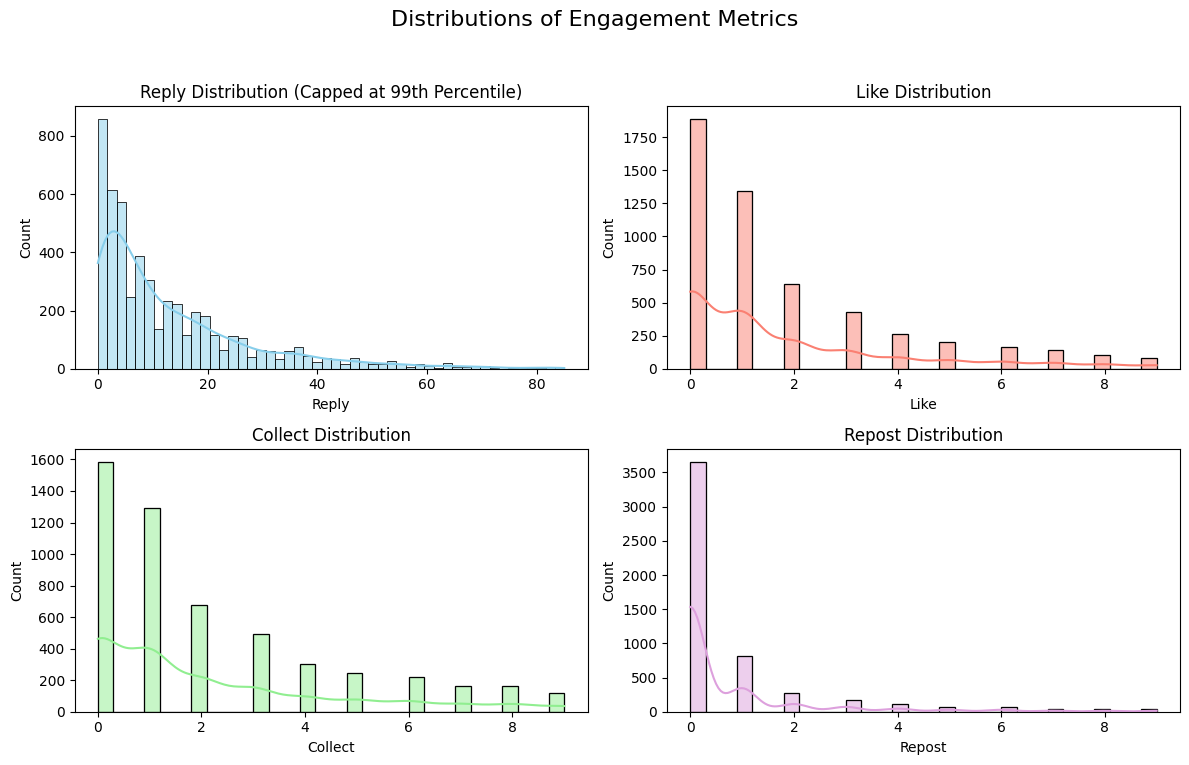

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_distributions(df):
    """Plots the distributions of 'Reply', 'Like', 'Collect', and 'Repost' with improved scaling for Reply."""

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Distributions of Engagement Metrics', fontsize=16)

    # Cap reply values at the 99th percentile to reduce long tail
    reply_cap = np.percentile(df['Reply'], 99)
    sns.histplot(df[df['Reply'] <= reply_cap]['Reply'], kde=True, ax=axes[0, 0], color='skyblue', bins=50)
    axes[0, 0].set_title('Reply Distribution (Capped at 99th Percentile)')

    sns.histplot(df['Like'], kde=True, ax=axes[0, 1], color='salmon', bins=30)
    axes[0, 1].set_title('Like Distribution')

    sns.histplot(df['Collect'], kde=True, ax=axes[1, 0], color='lightgreen', bins=30)
    axes[1, 0].set_title('Collect Distribution')

    sns.histplot(df['Repost'], kde=True, ax=axes[1, 1], color='plum', bins=30)
    axes[1, 1].set_title('Repost Distribution')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent title overlap
    plt.show()

plot_distributions(df)


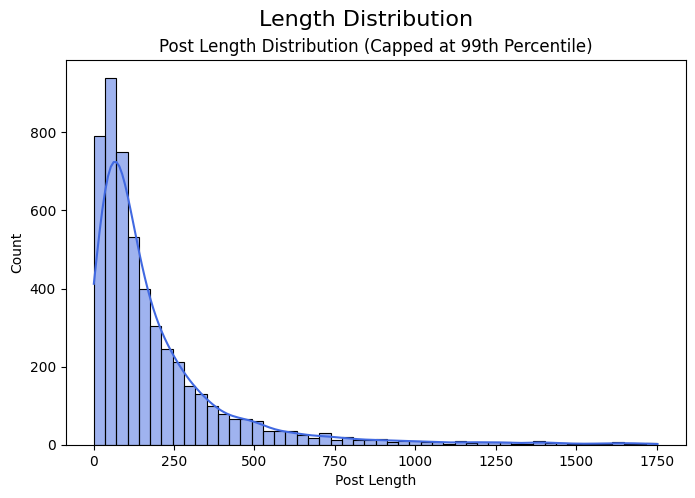

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_length_distribution(df):
    """Plots the distribution of the 'Length' column with outlier handling."""

    fig, ax = plt.subplots(figsize=(8, 5))
    fig.suptitle('Length Distribution', fontsize=16)

    # Cap Length values at the 99th percentile to reduce long-tail effects
    length_cap = np.percentile(df['Length'], 99)

    sns.histplot(df[df['Length'] <= length_cap]['Length'], kde=True, color='royalblue', bins=50)
    ax.set_title('Post Length Distribution (Capped at 99th Percentile)')
    ax.set_xlabel('Post Length')
    ax.set_ylabel('Count')

    plt.show()

plot_length_distribution(df)


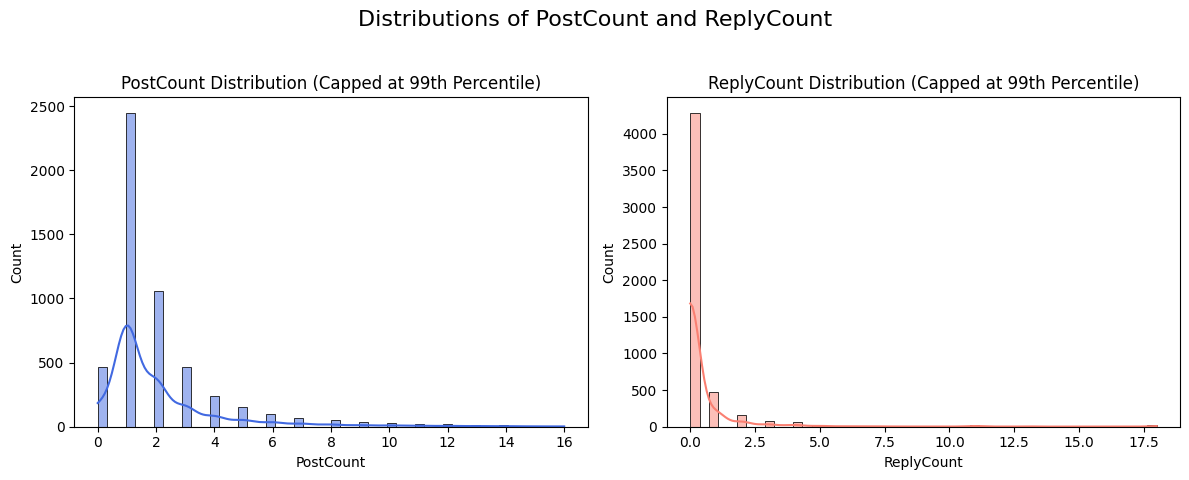

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_post_reply_distribution(df):
    """Plots the distributions of 'PostCount' and 'ReplyCount' with outlier handling."""

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle('Distributions of PostCount and ReplyCount', fontsize=16)

    # Cap extreme values at the 99th percentile
    post_cap = np.percentile(df['PostCount'], 99)
    reply_cap = np.percentile(df['ReplyCount'], 99)

    # Plot PostCount distribution
    sns.histplot(df[df['PostCount'] <= post_cap]['PostCount'], kde=True, ax=axes[0], color='royalblue', bins=50)
    axes[0].set_title('PostCount Distribution (Capped at 99th Percentile)')
    axes[0].set_xlabel('PostCount')
    axes[0].set_ylabel('Count')

    # Plot ReplyCount distribution
    sns.histplot(df[df['ReplyCount'] <= reply_cap]['ReplyCount'], kde=True, ax=axes[1], color='salmon', bins=50)
    axes[1].set_title('ReplyCount Distribution (Capped at 99th Percentile)')
    axes[1].set_xlabel('ReplyCount')
    axes[1].set_ylabel('Count')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap
    plt.show()

plot_post_reply_distribution(df)


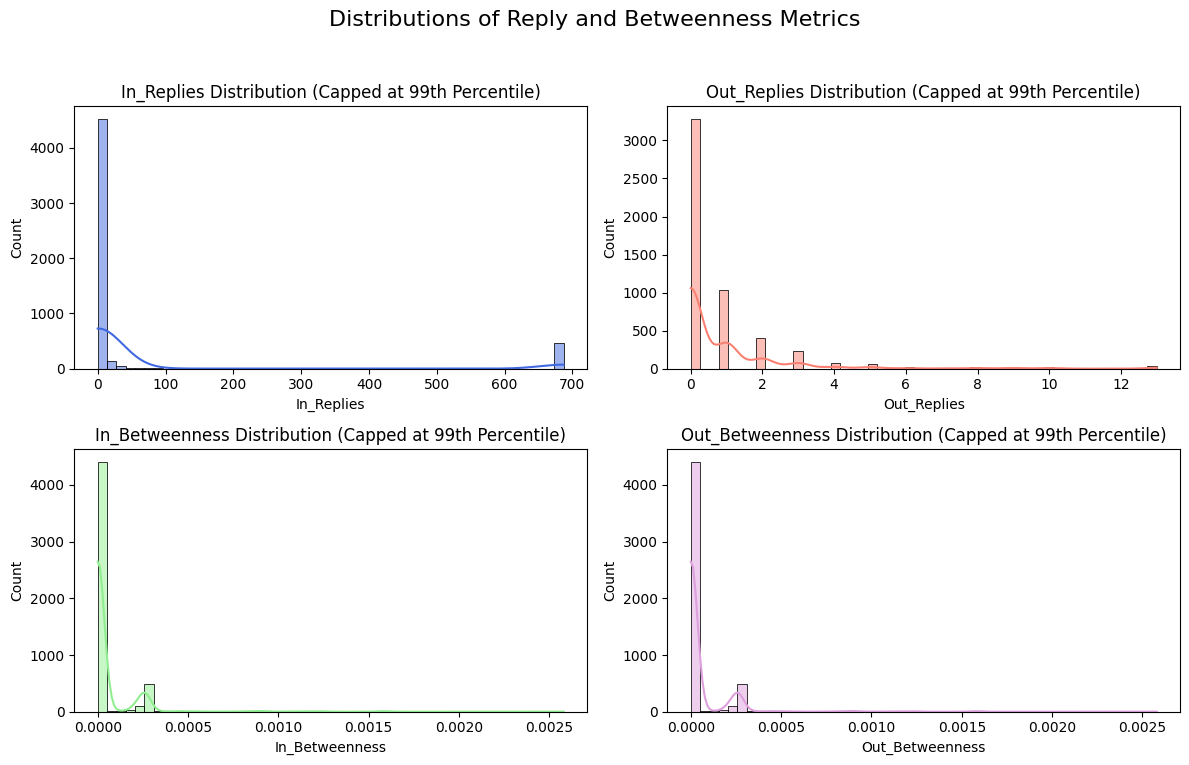

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_reply_betweenness_distribution(df):
    """Plots the distributions of 'In_Replies', 'Out_Replies', 'In_Betweenness', and 'Out_Betweenness' with outlier handling."""

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Distributions of Reply and Betweenness Metrics', fontsize=16)

    # Cap extreme values at the 99th percentile for better visualization
    caps = {
        'In_Replies': np.percentile(df['In_Replies'], 99),
        'Out_Replies': np.percentile(df['Out_Replies'], 99),
        'In_Betweenness': np.percentile(df['In_Betweenness'], 99),
        'Out_Betweenness': np.percentile(df['Out_Betweenness'], 99)
    }

    # Plot each distribution with caps applied
    sns.histplot(df[df['In_Replies'] <= caps['In_Replies']]['In_Replies'], kde=True, ax=axes[0, 0], color='royalblue', bins=50)
    axes[0, 0].set_title('In_Replies Distribution (Capped at 99th Percentile)')

    sns.histplot(df[df['Out_Replies'] <= caps['Out_Replies']]['Out_Replies'], kde=True, ax=axes[0, 1], color='salmon', bins=50)
    axes[0, 1].set_title('Out_Replies Distribution (Capped at 99th Percentile)')

    sns.histplot(df[df['In_Betweenness'] <= caps['In_Betweenness']]['In_Betweenness'], kde=True, ax=axes[1, 0], color='lightgreen', bins=50)
    axes[1, 0].set_title('In_Betweenness Distribution (Capped at 99th Percentile)')

    sns.histplot(df[df['Out_Betweenness'] <= caps['Out_Betweenness']]['Out_Betweenness'], kde=True, ax=axes[1, 1], color='plum', bins=50)
    axes[1, 1].set_title('Out_Betweenness Distribution (Capped at 99th Percentile)')

    # Improve layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_reply_betweenness_distribution(df)


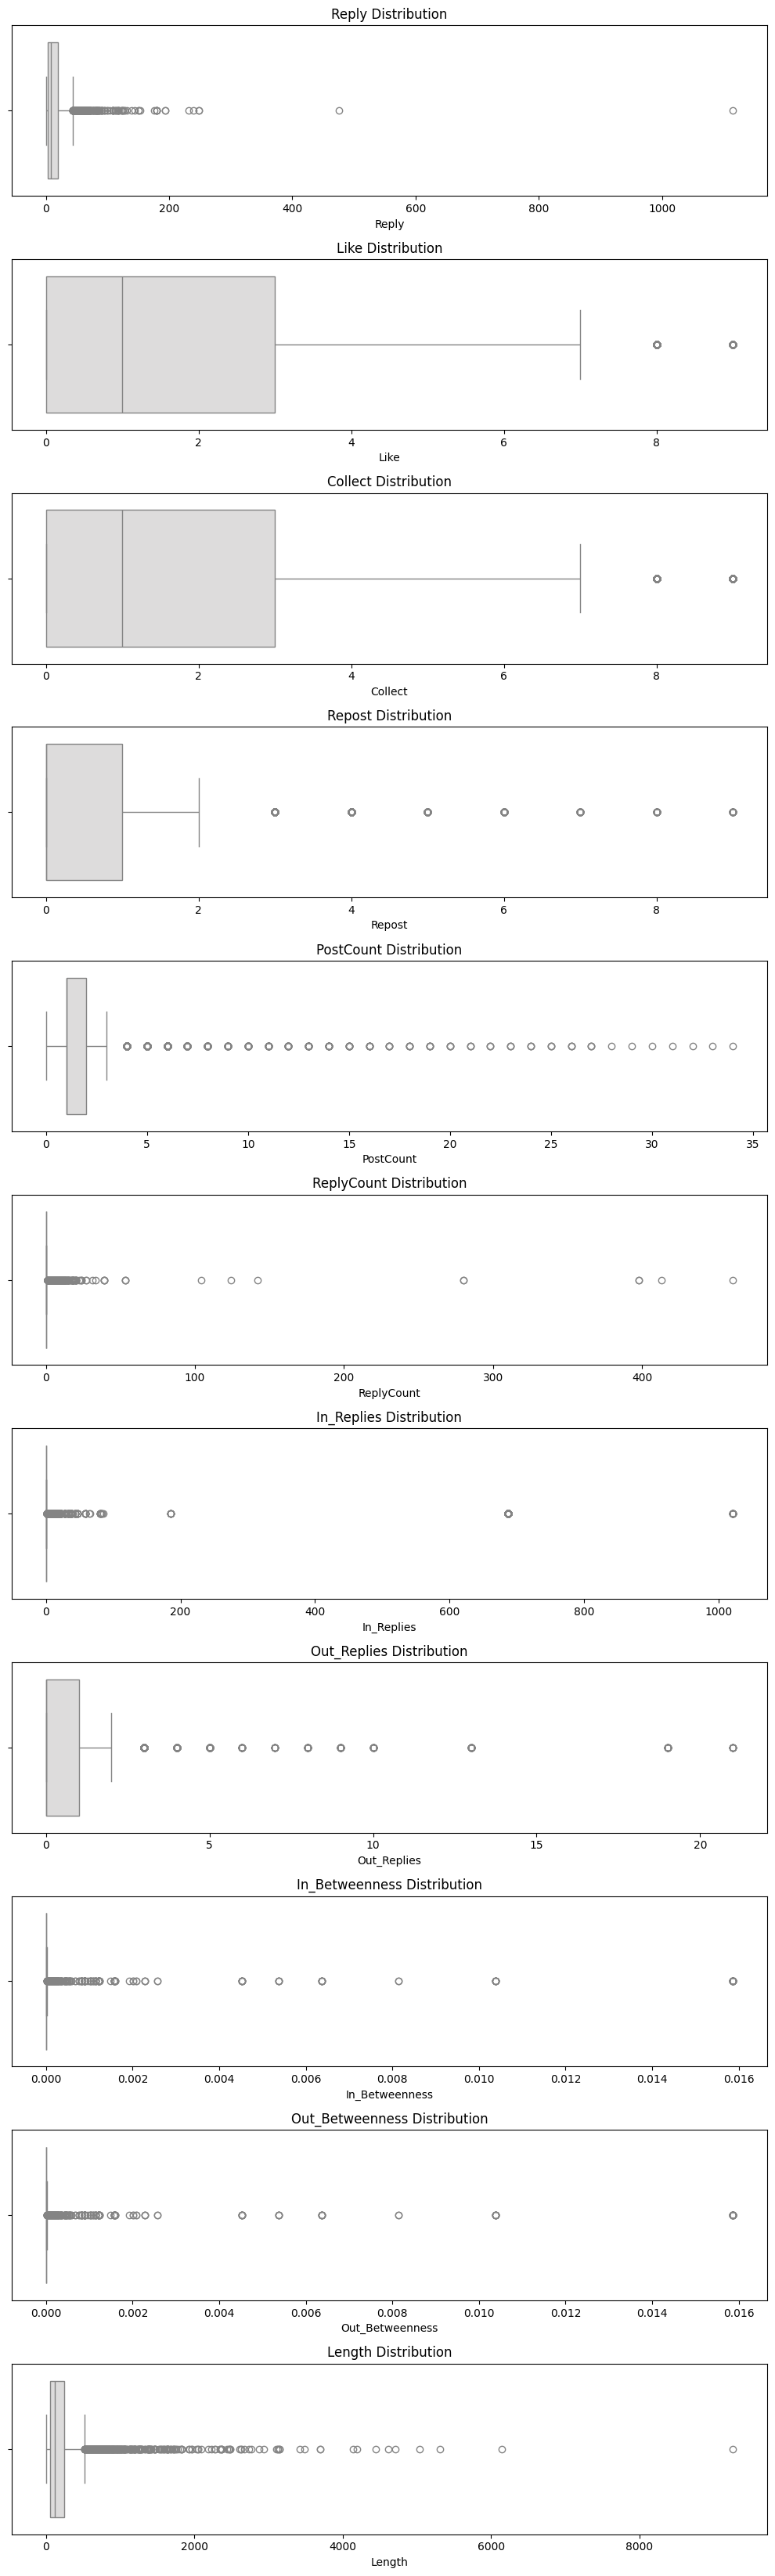

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features to plot separately
features = ['Reply', 'Like', 'Collect', 'Repost',
            'PostCount', 'ReplyCount',
            'In_Replies', 'Out_Replies', 'In_Betweenness', 'Out_Betweenness',
            'Length']

# Set up figure with multiple rows, one for each feature
fig, axes = plt.subplots(len(features), 1, figsize=(10, 3 * len(features)))

for i, feature in enumerate(features):
    sns.boxplot(data=df[feature], orient='h', palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate the percentage of zeros for each feature
zero_percentages = {feature: (df[feature] == 0).mean() * 100 for feature in features}

# Convert to DataFrame for better visualization
zero_df = pd.DataFrame.from_dict(zero_percentages, orient='index', columns=['Percentage of Zeros'])

# Display the DataFrame
zero_df


,Percentage of Zeros
Reply,10.734678
Like,35.953559
Collect,30.167491
Repost,69.585078
PostCount,8.926532
ReplyCount,81.537876
In_Replies,79.977160
Out_Replies,62.504758
In_Betweenness,52.607537
Out_Betweenness,52.607537


In [ ]:
# Recode sentiment_label: Positive = 1, Negative = 0
df['sentiment_label'] = df['sentiment_label'].map({'positive': 1, 'negative': 0})

# Calculate the percentage of positive sentiment
positive_percentage = df['sentiment_label'].mean() * 100

# Print the result
print(f'Percentage of Positive Sentiment: {positive_percentage:.2f}%')


Percentage of Positive Sentiment: 81.84%


In [ ]:
# Ensure "Category" is converted to numeric (0 and 1)
df['Category'] = pd.to_numeric(df['Category'], errors='coerce')

# Drop NaN values in case of conversion issues
df = df.dropna(subset=['Category'])

# Calculate the percentage of support-providing posts (Category = 1)
support_providing_percentage = df['Category'].mean() * 100

# Print the result
print(f'Percentage of Support-Providing Posts: {support_providing_percentage:.2f}%')


Percentage of Support-Providing Posts: 13.58%


<ipython-input-27-9b40c2706413>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PublishTime'] = pd.to_datetime(df['PublishTime'])


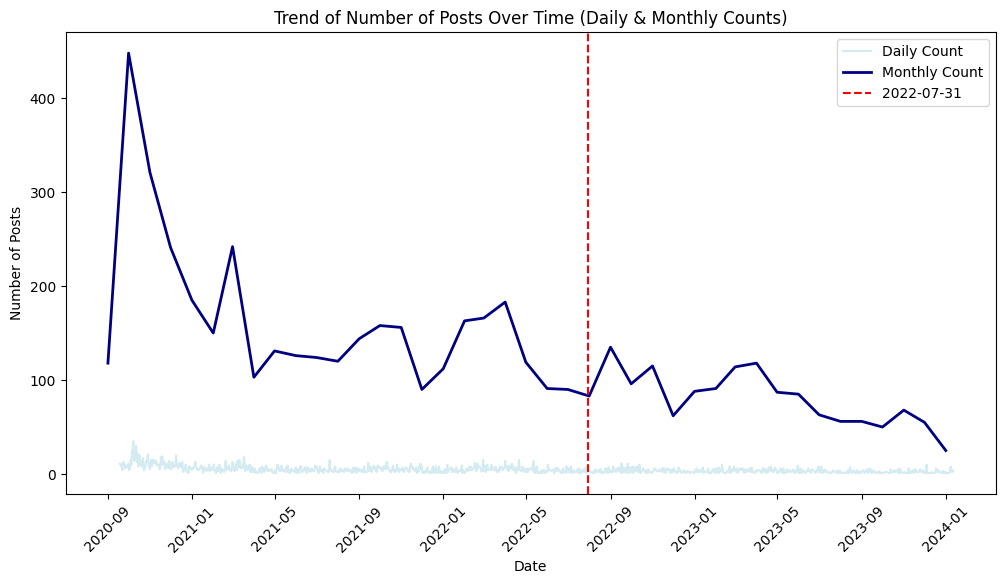

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'PublishTime' is in datetime format
df['PublishTime'] = pd.to_datetime(df['PublishTime'])

# Aggregate data: Count of posts per day and per month
df_daily = df.groupby(df['PublishTime'].dt.date).size()
df_monthly = df.groupby(df['PublishTime'].dt.to_period('M')).size()
df_monthly.index = df_monthly.index.to_timestamp()  # Convert to datetime for plotting

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_daily.index, y=df_daily, color='lightblue', label='Daily Count', alpha=0.5)
sns.lineplot(x=df_monthly.index, y=df_monthly, color='navy', linewidth=2, label='Monthly Count')

# Highlight the mark on "2022-07-31"
plt.axvline(pd.to_datetime("2022-07-31"), color='red', linestyle='--', label='2022-07-31')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Trend of Number of Posts Over Time (Daily & Monthly Counts)')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()


<ipython-input-22-7e523ee95794>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PublishTime'] = pd.to_datetime(df['PublishTime'])


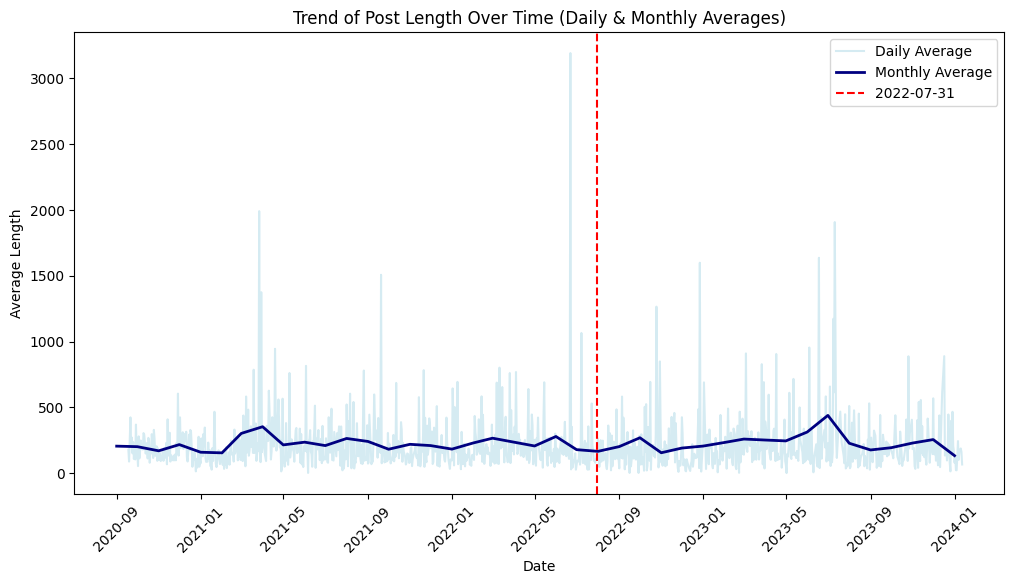

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'PublishTime' is in datetime format
df['PublishTime'] = pd.to_datetime(df['PublishTime'])

# Aggregate data: Mean 'Length' per day and per month
df_daily = df.groupby(df['PublishTime'].dt.date)['Length'].mean()
df_monthly = df.groupby(df['PublishTime'].dt.to_period('M'))['Length'].mean()

# Convert monthly index to datetime for plotting
df_monthly.index = df_monthly.index.to_timestamp()

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_daily.index, y=df_daily, color='lightblue', label='Daily Average', alpha=0.5)
sns.lineplot(x=df_monthly.index, y=df_monthly, color='navy', linewidth=2, label='Monthly Average')

# Highlight the mark on "2022-07-31"
plt.axvline(pd.to_datetime("2022-07-31"), color='red', linestyle='--', label='2022-07-31')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Average Length')
plt.title('Trend of Post Length Over Time (Daily & Monthly Averages)')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()


<ipython-input-23-3f4c723177dd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PublishTime'] = pd.to_datetime(df['PublishTime'])


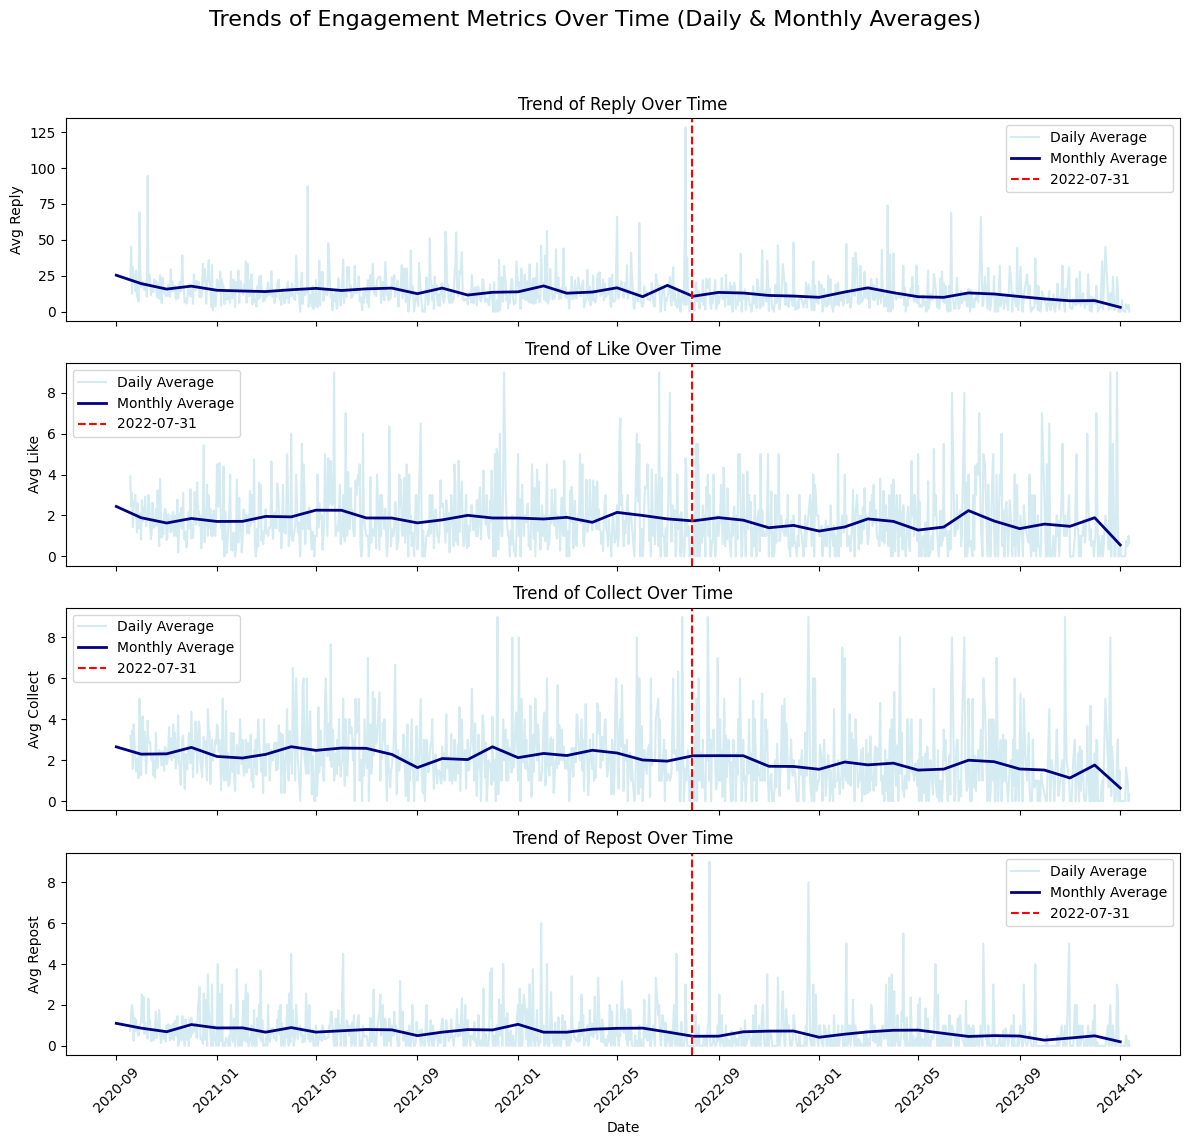

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'PublishTime' is in datetime format
df['PublishTime'] = pd.to_datetime(df['PublishTime'])

# Define engagement features
engagement_features = ['Reply', 'Like', 'Collect', 'Repost']

# Create subplots for each feature
fig, axes = plt.subplots(len(engagement_features), 1, figsize=(12, 12), sharex=True)
fig.suptitle('Trends of Engagement Metrics Over Time (Daily & Monthly Averages)', fontsize=16)

for i, feature in enumerate(engagement_features):
    # Aggregate data: Mean per day and per month
    df_daily = df.groupby(df['PublishTime'].dt.date)[feature].mean()
    df_monthly = df.groupby(df['PublishTime'].dt.to_period('M'))[feature].mean()
    df_monthly.index = df_monthly.index.to_timestamp()  # Convert to datetime for plotting

    # Plot the trends
    sns.lineplot(x=df_daily.index, y=df_daily, color='lightblue', label='Daily Average', alpha=0.5, ax=axes[i])
    sns.lineplot(x=df_monthly.index, y=df_monthly, color='navy', linewidth=2, label='Monthly Average', ax=axes[i])

    # Highlight the mark on "2022-07-31"
    axes[i].axvline(pd.to_datetime("2022-07-31"), color='red', linestyle='--', label='2022-07-31')

    # Labels and title
    axes[i].set_title(f'Trend of {feature} Over Time')
    axes[i].set_ylabel(f'Avg {feature}')
    axes[i].legend()

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()


<ipython-input-25-50eb265ed1bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PublishTime'] = pd.to_datetime(df['PublishTime'])


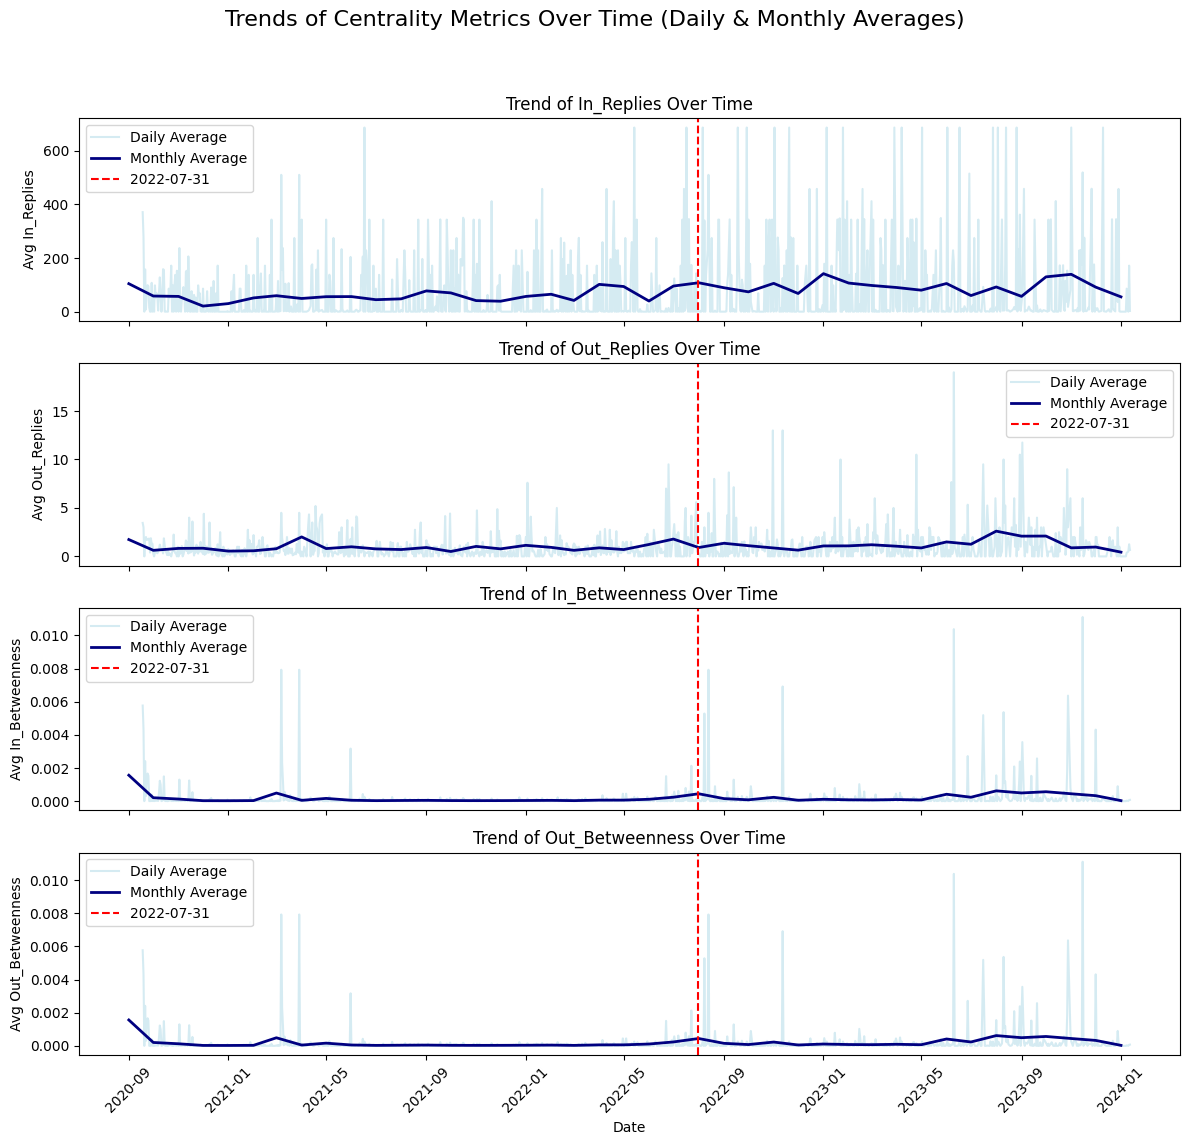

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'PublishTime' is in datetime format
df['PublishTime'] = pd.to_datetime(df['PublishTime'])

# Define centrality features
centrality_features = ['In_Replies', 'Out_Replies', 'In_Betweenness', 'Out_Betweenness']

# Create subplots for each feature
fig, axes = plt.subplots(len(centrality_features), 1, figsize=(12, 12), sharex=True)
fig.suptitle('Trends of Centrality Metrics Over Time (Daily & Monthly Averages)', fontsize=16)

for i, feature in enumerate(centrality_features):
    # Aggregate data: Mean per day and per month
    df_daily = df.groupby(df['PublishTime'].dt.date)[feature].mean()
    df_monthly = df.groupby(df['PublishTime'].dt.to_period('M'))[feature].mean()
    df_monthly.index = df_monthly.index.to_timestamp()  # Convert to datetime for plotting

    # Plot the trends
    sns.lineplot(x=df_daily.index, y=df_daily, color='lightblue', label='Daily Average', alpha=0.5, ax=axes[i])
    sns.lineplot(x=df_monthly.index, y=df_monthly, color='navy', linewidth=2, label='Monthly Average', ax=axes[i])

    # Highlight the mark on "2022-07-31"
    axes[i].axvline(pd.to_datetime("2022-07-31"), color='red', linestyle='--', label='2022-07-31')

    # Labels and title
    axes[i].set_title(f'Trend of {feature} Over Time')
    axes[i].set_ylabel(f'Avg {feature}')
    axes[i].legend()

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()


<ipython-input-26-08fe1c4c48b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PublishTime'] = pd.to_datetime(df['PublishTime'])
<ipython-input-26-08fe1c4c48b1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_label'] = pd.to_numeric(df['sentiment_label'], errors='coerce')


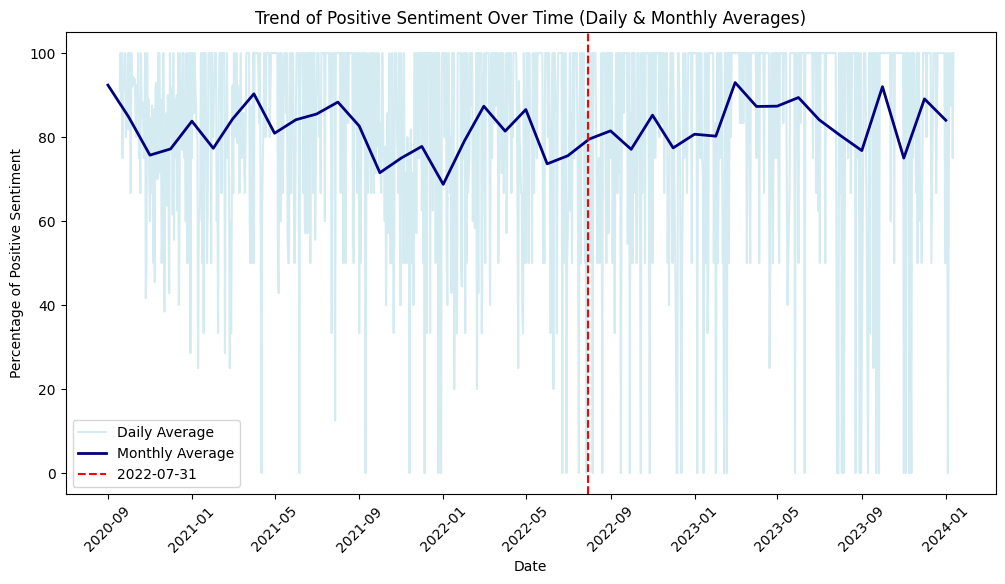

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'PublishTime' is in datetime format
df['PublishTime'] = pd.to_datetime(df['PublishTime'])

# Ensure 'sentiment_label' is numeric (1 for positive, 0 for negative)
df['sentiment_label'] = pd.to_numeric(df['sentiment_label'], errors='coerce')

# Aggregate data: Percentage of positive sentiment per day and per month
df_daily = df.groupby(df['PublishTime'].dt.date)['sentiment_label'].mean() * 100
df_monthly = df.groupby(df['PublishTime'].dt.to_period('M'))['sentiment_label'].mean() * 100
df_monthly.index = df_monthly.index.to_timestamp()  # Convert to datetime for plotting

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_daily.index, y=df_daily, color='lightblue', label='Daily Average', alpha=0.5)
sns.lineplot(x=df_monthly.index, y=df_monthly, color='navy', linewidth=2, label='Monthly Average')

# Highlight the mark on "2022-07-31"
plt.axvline(pd.to_datetime("2022-07-31"), color='red', linestyle='--', label='2022-07-31')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Percentage of Positive Sentiment')
plt.title('Trend of Positive Sentiment Over Time (Daily & Monthly Averages)')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()


# Active user detection

In [ ]:
import pandas as pd

# Ensure 'PublishTime' is in datetime format
df['PublishTime'] = pd.to_datetime(df['PublishTime'])

# Sort the dataframe by PublishTime to ensure cumulative count is calculated correctly
df = df.sort_values(by=['Author', 'PublishTime'])

# Compute cumulative PostCount and ReplyCount for each author
df['PostCount'] = df.groupby('Author').cumcount() + 1
df['ReplyCount'] = df.groupby('Author')['Reply'].cumsum()

# Find the highest PostCount and ReplyCount for each author and include Author_ID
df_user_frequency = df.groupby(['Author', 'Author_ID'])[['PostCount', 'ReplyCount']].max().reset_index()

# Display the new dataframe
df_user_frequency


,Author,Author_ID,PostCount,ReplyCount
0,#琴琴贴贴🎻#,1745,1,4
1,(๑´ڡ`๑),110,4,13
2,-,2249,3,90
3,-Agnés,1730,1,3
4,-Cutehuan-,2034,1,2
...,...,...,...,...
2437,🦖,2259,1,16
2438,🦞,2245,1,2
2439,🦷🦷乐,217,3,8
2440,🧸,609,1,5


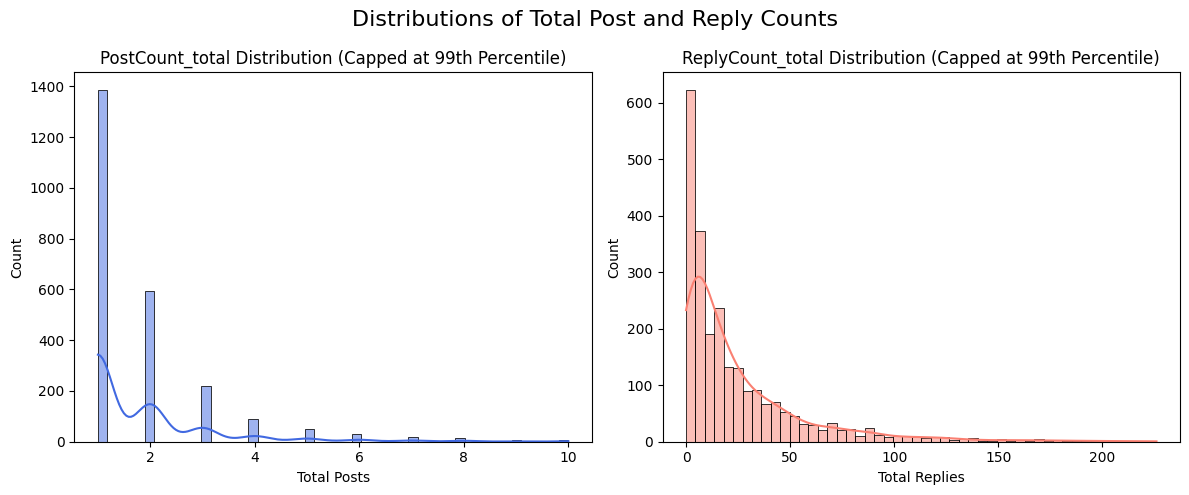

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Rename columns
df_user_frequency = df_user_frequency.rename(columns={'PostCount': 'PostCount_total', 'ReplyCount': 'ReplyCount_total'})

# Define features to visualize
features = ['PostCount_total', 'ReplyCount_total']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Distributions of Total Post and Reply Counts', fontsize=16)

# Cap extreme values at the 99th percentile for better visualization
caps = {feature: np.percentile(df_user_frequency[feature], 99) for feature in features}

# Plot each distribution with caps applied
sns.histplot(df_user_frequency[df_user_frequency['PostCount_total'] <= caps['PostCount_total']]['PostCount_total'],
             kde=True, ax=axes[0], color='royalblue', bins=50)
axes[0].set_title('PostCount_total Distribution (Capped at 99th Percentile)')
axes[0].set_xlabel('Total Posts')

sns.histplot(df_user_frequency[df_user_frequency['ReplyCount_total'] <= caps['ReplyCount_total']]['ReplyCount_total'],
             kde=True, ax=axes[1], color='salmon', bins=50)
axes[1].set_title('ReplyCount_total Distribution (Capped at 99th Percentile)')
axes[1].set_xlabel('Total Replies')

plt.tight_layout()
plt.show()


In [ ]:
# Merge df with df_user_frequency to add PostCount_total and ReplyCount_total
df = df.merge(df_user_frequency, on='Author_ID', how='left')

df.drop(columns=['Author_y'], inplace=True)
df = df.rename(columns={'Author_x': 'Author'})

# Display the updated dataframe
df.head()

,Title,Post_ID,Text,Author,Author_ID,Reply,LastReply,PublishTime,Like,Collect,...,Category,PostCount,ReplyCount,male_excluded,In_Replies,Out_Replies,In_Betweenness,Out_Betweenness,PostCount_total,ReplyCount_total
0,women in math数学女性小组开张啦！欢迎来玩！,3000,大家好，经组长许可，在这里给新建的小组做个宣传🎉🎉www.douban.com/group/...,#琴琴贴贴🎻#,1745,4,2021-05-23,2021-05-08,6,1,...,1.0,1,4,0,0.0,0.0,0.0,0.0,1,4
1,有姐妹做女性學相關的研究嗎,3701,目前在考虑研究生读女性相关的研究不知道组里的姐妹有没有学这个的想問問關於研究生選校還有就業相...,(๑´ڡ`๑),110,7,2020-12-12,2020-12-11,4,5,...,0.0,1,7,0,0.0,0.0,0.0,0.0,4,13
2,有读博的打算，文科硕士第一年暑假该怎么安排,613,楼主现在在法国读硕士，学的是人文社科，有读博的打算，目前M1第一年没剩几个月就结束了。但学校...,(๑´ڡ`๑),110,5,2023-04-26,2023-04-23,2,0,...,0.0,2,12,1,0.0,0.0,0.0,0.0,4,13
3,求助｜寻求硕士论文（性别研究）受访者🥺作为回馈会在组里...,329,如题，楼主最近正在写M1的学年论文，目前还受访者，我研究的主题是关于中国女性当前的就业情况，...,(๑´ڡ`๑),110,1,2023-08-18,2023-08-18,0,0,...,0.0,3,13,1,0.0,0.0,0.0,0.0,4,13
4,如何保持对研究主题/领域的兴趣,131,楼主目前m2在读，已经选好了毕业论文的主题也和m1时期做的小论文主题有关，但是随着时间逐渐对...,(๑´ڡ`๑),110,0,2023-11-27,2023-11-27,1,0,...,0.0,4,13,1,0.0,0.0,0.0,0.0,4,13
